# Introducción

A representación gráfica é unha das ferramentas máis potentes para explorar datos, e hoxe en día unha das tarefas máis importantes tanto para enxeñeiros como científicos. De feito, os gráficos úsanse tanto para expoñer como para entender datos e para comprobar visualmente resultados calculados.

O módulo de Python máis amplamente usado para a representación gráfica é **Matplotlib** (<http://matplotlib.org/>), que será fundamentalmente o que usaremos neste curso. Este módulo é moi potente e posúe moitisimas funcionalidades. Esta práctica trata de introducir algúns dos elementos máis básicos. Para ter unha idea de todas as posibilidades que ofrece este módulo, pódese visitar a *Matplotlib Gallery* (http://matplotlib.org/gallery.html).

## Obxectivos

- Uso de Matplotlib no plano e no espazo tridimensional
- Representación gráfica de vectores
- Representación de rexións no plano
- Visualización de obxectos (superficies) no espazo tridimensional

# Uso de Matplotlib

Para usar **Matplotlib** (con versión 3.1.0), necesitamos importar o seu módulo. Posto que usaremos a partir da interface `pyplot`, tamén será necesario importar `pyplot`:

In [2]:
import matplotlib as mp
import matplotlib.pyplot as plt
mp.__version__

'3.1.0'

Evidetemente para realizar cálculos numéricos de forma eficiente, tamén será preciso importar o módulo **Numpy**:

In [6]:
import numpy as np

Matplotlib é unha librería de Python que pode ser empregar fora dos *notebooks* Jupyter para representar gráficamente tanto funcións como entidaeds xeométricas (xa sexa por pantalla ou gardalas nun ficheiro). Para que as representacións gráficas aparezan incrustadas neste documento, usaremos o comando *máxico* 
`%matplotlib inline`. Polo contrario se é necesario interactuar coas gráficas se podería usar tamén a opción `%matplotlib notebook`

In [7]:
%matplotlib inline

Para incrementar o tamaño da fonte que aparecen nos eixes ou no texto das gráficas, pódese incrementar o tamaño da fonte por defecto usando:
```python
matplotlib.rcParams.update({'font.size': 16})
```

# Representación gráfica de vectores en $\mathbb{R}^2$ e $\mathbb{R}^3$

No que segue, en primeiro lugar, representárase gráficamente tres vectores en $\mathbb{R}^2$, cada un dunha cor diferente e gardaremos o resultado desta visualización nun arquivo de extensión `.pdf`:

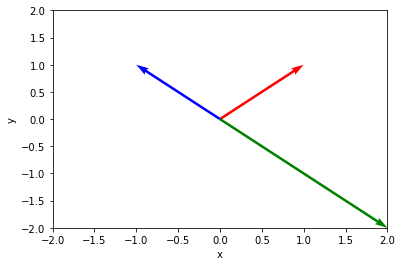

In [8]:
# Matriz cos datos dos vectores
V = np.array([[1,1],[-1,1],[2,-2]])

# Representación gráfica de vectores 2D
plt.quiver([0], [0], V[:,0], V[:,1], color=['r','b','g'], angles='xy', scale_units='xy', scale=1)

# Definición dos limites dos eixes
plt.xlim([-2,2])
plt.ylim([-2,2])

# Etiquetas dos eixes
plt.xlabel('x')
plt.ylabel('y')

# Escritura a ficheiro e visualización
plt.savefig("grafica-con-vectores.pdf")
plt.show()

A representación gráfica de elementos tridimensionais debe facerse empregando un módulo diferente de **Matplotlib**, que é **Axes3D**. Deste xeito, volveríamos a empregar a función `quiver`:

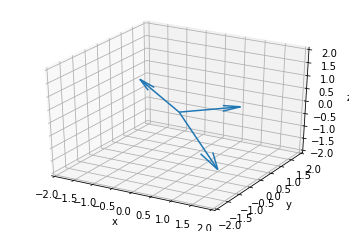

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# Datos dos vectores
V = np.array([[1,1,0],[-1,0,1],[1,0,-2]])

# Inicialización da representación 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Representación dos vectores
ax.quiver([0], [0], [0], V[:,0], V[:,1], V[:,2])
# Axuste dos límites dos eixes
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])

# Etiquetas dos eixes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Usando as funcións `np.dot` e `np.cross` pódese calcular o produto escalar e o produto vectorial de dous vectores.

### Exercicio 3.1 
Dados os vectores $\vec{u}=(1,0,1)^t$ e $\vec{v}=(-1,2,0)^t$. Calcula a representa graficamente o vector que resulta ao proxectar $\vec{u}$ sobre $\vec{v}$.

In [9]:
## O TEU CÓDIGO AQUÍ

### Exercicio 3.2
Tendo en conta os vectores anteriores, calcula a representa graficamente o vector $\vec{u}\times\vec{v}$. 

In [10]:
## O TEU CÓDIGO AQUÍ

### Exercicio 3.3
Tendo en conta os vectores anteriores e o vector $\vec{w}=(0,1,1)^t$, calcula o valor do produto mixto e representa graficamente os vértices do paralepípedo ao que se lle está a calcular o volume.

In [11]:
## O TEU CÓDIGO AQUÍ

# Representación gráfica de rexións no plano

Da mesma forma a como se pode empregar o módulo **Matplotlib** para facer representacións gráficas de vectores, tamén se pode empregar **Sympy** para representar rexións no plano. O primeiro paso é importar o módulo de **Sympy** (coa version 1.4) e definir as coordenadas cartesianas $x,y,z$:

In [13]:
import sympy as sp
x, y, z = sp.symbols('x:z', real=True)
sp.__version__

'1.4'

Para representar graficamente un conxunto de puntos ou ben unha rexión empregarase a función `plot_implicit`. Por xemplo, no caso de querer representar os puntos ca circunferencia centrada na orixe de coordenadas e de radio $\sqrt{5}$:

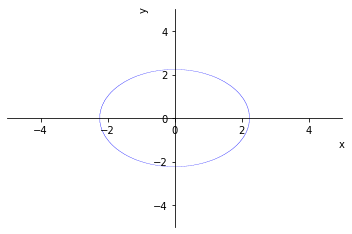

<class 'sympy.core.relational.Equality'>


In [14]:
eq = sp.Eq(x**2 + y**2, 5)
p1 = sp.plot_implicit(eq)
print(type(eq))

Para visualizar rexións tamén se poden empregar desigualdades como argumento da función `plot_implicit`:

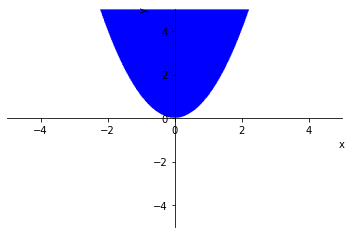

In [14]:
ineq = y > x**2
p2 = sp.plot_implicit(ineq)

As condicións lóxicas usadas como argumento de `plot_implicit` tamén poden incluir operadores lóxicos `sp.And` ou `sp.Or` (ou ben `&` e `|`). Nembargantes, existe un *bug* na versión de **Sympy** 1.4.0 co uso de operadores lóxicos, que xa foi solucionado na versión estable actual 1.5.1 (véxase https://github.com/sympy/sympy/issues/17710):

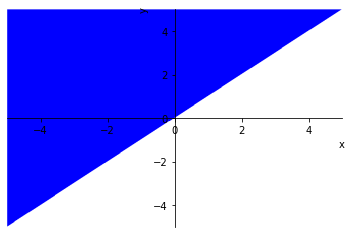

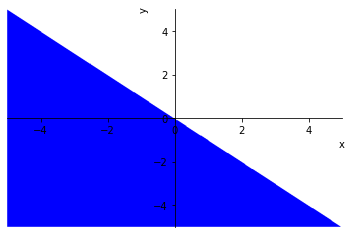

In [15]:
p3 = sp.plot_implicit(y > x)
p3 = sp.plot_implicit((y > x) & (y < -x)) # Implementación cun bug na versión 1.4.0


### Exercicio 3.4
Representa graficamente as seguintes rexións ou conxuntos no plano:
- O conxunto de puntos que satisfan $y=2x^2-3$
- A rexión do plano dos puntos que cumpren $|y|<2$
- A rexión do plano dos puntos que están no interior da elipse de radios $5$ e $3$ (nas direccións dos eixes coordenados) e centrada no punto $(2,3)$

In [16]:
## O TEU CÓDIGO AQUÍ

# Representación gráfica de superficies no espazo tridimensional

Nin **Sympy** nin tampouco o módulo **Matplotlib** posúen unha forma sinxela de representar superficies tridimensionais. Para esta tarefa, existen outras librerías moito máis especializadas en visualización de datos científicos como **Mayavi** (que non estudaremos neste curso). Para máis información, pódese consultar https://docs.enthought.com/mayavi/mayavi/.

Nembargantes, a partir de **Matplotlib** e do uso da librería **Scikit-image** (versión 0.16.2), ódese implementar a función `isosurface` a partir da cal se poden representar gráficamente iso-superficies das ecuacións implicitas de calquera das superficies que estudiaremos no Tema 1 deste curso.

En primeiro lugar, nos aseguramos que temos dispoñible o módulo **Scikit-image**

In [17]:
!pip -q install scikit-image

Esta é a implementación da función `isosurface` (descargable dende https://github.com/gpeyre/numerical-tours) que imos a usar no resto deste documento:

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from mpl_toolkits.mplot3d import Axes3D

def isosurface(M,v,step,title=""):
    """
    returns the isosurface of value v of M, subsetting M with the steps argument
    """
    # Get the vertices and faces of a given isosurface
    sel = np.arange(0,np.shape(M)[0],step)
    verts, faces = measure.marching_cubes_classic(M[np.ix_(sel,sel,sel)], v, spacing=(1,1,1))
    # Plot in 3D with a fixed scaling in all Cartesian axis
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], lw=.1, cmap="jet")
    scaling = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
    ax.auto_scale_xyz(*[[np.min(scaling), np.max(scaling)]]*3)
    ax.axis("off")
    plt.show()

Agora podemos usar a funcion `isosurface` para pintar obxectos tridimensionais como esferas, elipsoides, hiperboloides, etc:

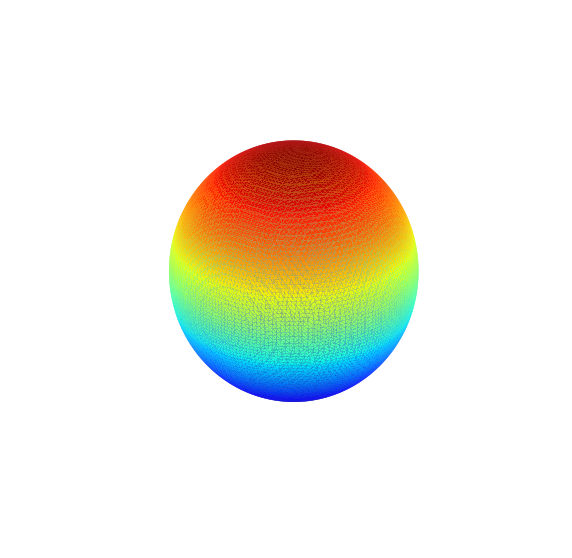

In [19]:
# Representar a esfera de radio 1
p = np.linspace(-1.5,1.5,100)
x, y, z = np.meshgrid(p, p, p)
values = x*x + y*y + z*z
isosurface(values, 1., 1)

To plot two functions on one graph, we use `plt.plot` twice:

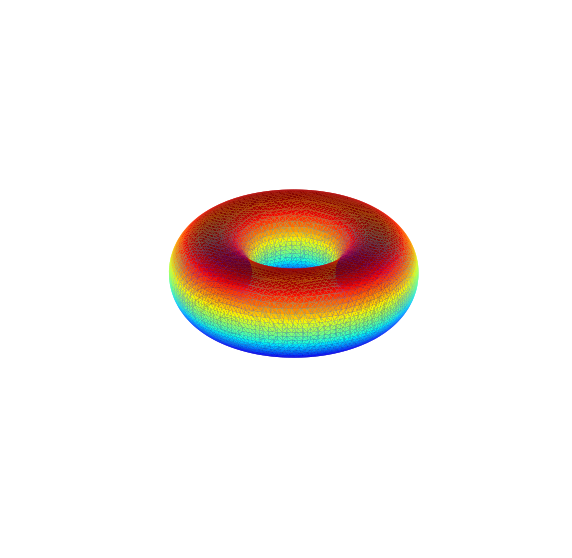

In [20]:
# Representar un toro de radio exterior (R) e interior (r)
p = np.linspace(-5.,5,100)
R = 2; r = 1
x, y, z = np.meshgrid(p, p, p)
values = (R - np.sqrt(x**2 + y**2))**2 + z**2 - r**2
isosurface(values, 0., 1)

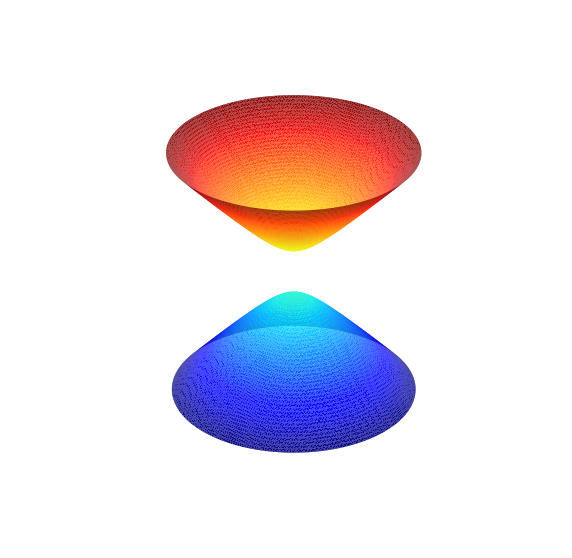

In [21]:
# Hiperboloide de dúas follas
p = np.linspace(-5.,5,100)
x, y, z = np.meshgrid(p, p, p)
values = z**2 - y**2 -x**2 - 1.
isosurface(values, 0., 1)

### Exercicio 3.5 
Representa graficamente as seguintes superficies:
- Un elipsoide
- Un hiperboloide dunha folla que o seu eixe coincida co eixe $x$
- Un cono elíptico que o seu eixe coincida co eixe $y$
- Un paraboloide elíptico que teña o seu eixe na recta $z=y=0$
- Un paraboloide hiperbólico 

In [22]:
## O TEU CÓDIGO AQUÍ